# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
# Make sure the datefields in the data are parsed as datetime(64)
mrsa_neg = pd.read_csv("../deidentified/MRSA_neg.csv", parse_dates=['COLLECTED','ADM_DATE'])
mrsa_pos = pd.read_csv("../deidentified/MRSA_pos.csv", parse_dates=['COLLECTED','ADM_DATE'])

In [4]:
# Combine data from positive and negative samples and check for duplicates
MRSA = pd.concat([mrsa_pos, mrsa_neg], ignore_index=True)
MRSA.ACCN.duplicated().value_counts()


False    21849
True        78
Name: ACCN, dtype: int64

In [5]:
#Remove duplicates
noDupesMRSA = MRSA.drop_duplicates(subset=['ACCN','COLLECTED','coded_uid','coded_mrn'])
noDupesMRSA.ACCN.duplicated().value_counts()

False    21849
Name: ACCN, dtype: int64

In [6]:
noDupesMRSA

,ACCN,ADM_DATE,COLLECTED,E_LOC_FACILITY_DISP,E_MED_SERVICE_DISP,MS_BODY_SITE_DISP,MS_COLLECT_LOC_NURSE_UNIT_DISP,MS_SERVICE_RESOURCE_DISP,MS_SOURCE_DISP,ORDERABLE,POSITIVE_IND,P_SEX_DISP,REPORTED,RESPONSE_TEXT,coded_mrn,coded_uid
0,04-11-001-0010,2010-12-15,2011-01-01,WESTMEAD HOSP,Haematology,.Peripheral,WE W.C5A,WMD Epicentre,Blood,Blood Culture,1,Female,Final,Methicillin resistant Staphylococcus aureus,3814,1178
1,04-11-001-0980,2010-07-12,2011-01-01,WESTMEAD HOSP,Haematology,Combine,WE W.E3B,WMD Routine Micro Bench,Screen,MRSA Detection,1,Female,Final,Methicillin resistant Staphylococcus aureus,2929,3148
2,04-11-001-1412,2011-01-01,2011-01-01,WESTMEAD HOSP,NaN,Toe 1st Big L,WE Emergency Dept,WMD Routine Micro Bench,Swab,Culture Wound,1,Male,Final,Methicillin resistant Staphylococcus aureus,569,2595
3,04-11-002-0009,2010-12-15,2011-02-01,WESTMEAD HOSP,Haematology,.Peripheral,WE W.C5A,WMD Epicentre,Blood,Blood Culture,1,Female,Final,Methicillin resistant Staphylococcus aureus,3814,1178
4,04-11-002-0804,2011-02-01,2011-02-01,WESTMEAD HOSP,NaN,Hip Unspecified,WE C.PACC,WMD Routine Micro Bench,Swab,Culture Wound,1,Male,Final,Methicillin resistant Staphylococcus aureus,2810,2170
5,02-11-002-0862,2011-01-01,2011-02-01,BLACKTOWN HOSP,"Renal Medicine, nec",Combine,BL W.B41 Med 2,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,1396,946
6,02-11-002-1661,2011-02-01,2011-02-01,BLACKTOWN HOSP,NaN,Groin R,BL Emergency Dept,WMD Routine Micro Bench,Swab,Culture Wound,1,Female,Final,Methicillin resistant Staphylococcus aureus,4699,1985
7,02-11-003-0280,2010-12-14,2011-03-01,BLACKTOWN HOSP,Acute Geriatrics,NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,4781,2105
8,02-11-003-0838,2009-08-06,2011-03-01,BLACKTOWN HOSP,Acute Geriatrics,NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,1533,1346
9,02-11-003-0846,2010-12-11,2011-03-01,BLACKTOWN HOSP,"Cardiology, nec",NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,4006,3930


# Establishing a Baseline Prediction

In [7]:
#Group by date collected
grouped_by_COLLECTED = noDupesMRSA.POSITIVE_IND.groupby(noDupesMRSA.COLLECTED)
infection_numbers = grouped_by_COLLECTED.sum()
sample_numbers = grouped_by_COLLECTED.size()
infection_rates = infection_numbers/sample_numbers
plt.plot(infection_rates, 'x')
#Total MRSA infections / Total number of samples
overall_infection_rate = 1.0*infection_numbers.sum()/sample_numbers.sum()
plt.axhline(y=overall_infection_rate, color='r', linestyle='-')
overall_infection_rate

0.5730239370222894

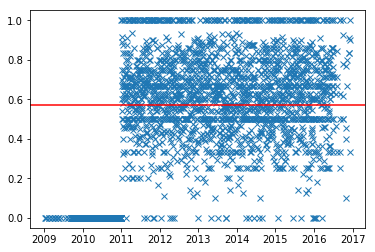

In [8]:
#Plot of daily infection rate in blue, overall infection rate in red
plt.show()

We need to establish a baseline prediction from which we can benchmark the efficacy of the various models we will use.
Suppose we were to guess a 57.3% likelyhood of MRSA infection for each day. Let us use the mean absolute difference with respect to the actual daily infection rates to calculate this baseline cost.

In [11]:
cost = (abs(infection_rates - overall_infection_rate)/infection_rates.size).sum()
cost

0.23363003824608097

# Simple Moving Window Approach

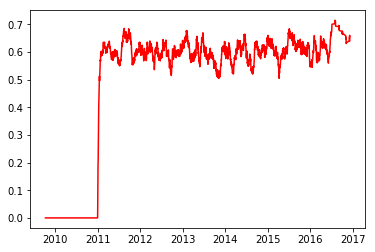

In [12]:
window_size = 30
window_infections = infection_numbers.shift().rolling(window=window_size).sum()
window_samples = sample_numbers.shift().rolling(window=window_size).sum()

moving_window_model = (window_infections/window_samples)[window_size:]
plt.plot(moving_window_model, color='r')
plt.show()


In [13]:
#cost of moving window model
ir = infection_rates[window_size:]
cost = (abs(moving_window_model-ir)/ir.size).sum()
cost

0.14339413032498782